In [1]:
import pandas as pd
import numpy as np
import math
import os

import matplotlib.pyplot as plt

In [2]:
# PARAMS
# Where do you want to save all graphs/images
save_location = "C:\\Users\\Nick\\OneDrive - The University of Texas at Austin\\Research\\Angel Data\\AnkGver1\\AnkG\\velocityGraphs\\" 

# where are the CSV files?
csv_location = r"C:\Users\Nick\OneDrive - The University of Texas at Austin\Research\Angel Data\AnkGver1\AnkG\CSVs"

# What colors do you want the single plots to be?
colors = ['r','y','g','c','b','m','k']

In [6]:
# open the CSV and return the dataframe
def readCSV(file_path):
    
    df = pd.read_csv(file_path)
    
    # Clean up headers
    df.loc[0] = df.loc[0] + '_' + df.loc[1]
    df = df.drop(index=1)
    header = df.iloc[0]
    df = df.rename(columns=header)
    df = df.drop(index=0)
    df = df.reset_index(drop=True)
    
    return df

# Calculate the velocity by using a 7 frame rolling average of position
def velArray(x, y):
    x_array = x.rolling(7).mean()
    y_array = y.rolling(7).mean()

    v_array = np.zeros(len(x_array))

    for x in range(1, len(v_array)):
        if(x > 0):
            v_array[x] = math.sqrt(((x_array[x-1] - x_array[x])**2) + ((y_array[x-1] - y_array[x])**2))
        else:
            v_array[x] = v_array[x-1]

    return v_array

In [7]:
# Plot all velocity graphs on a single plot
def layerPlot(df, name):
    x_array = [ d for d in df if '_x' in d ] 
    y_array = [ d for d in df if '_y' in d ]

    plt.figure()
    plt.ylim(0,20)
    
    for i in range(len(x_array)):
        x = x_array[i]
        y = y_array[i]

        plt.plot(velArray(df[x], df[y]), label=x[:-2])

    plt.title(name) 
    lgd = plt.legend(bbox_to_anchor=(1.05, 1))
    plt.savefig(save_location + name + "_layered", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)
    
# Plot individual velocity graphs
def singlePlot(df, name):
    x_array = [ d for d in df if '_x' in d ] 
    y_array = [ d for d in df if '_y' in d ]

    fig,a = plt.subplots(len(x_array), sharex=True)
    plt.setp(a, yticks=[])
    fig.suptitle(name)
    for i in range(len(x_array)):
        x = x_array[i]
        y = y_array[i]

        a[i].set_ylim([0,20])
        a[i].plot(velArray(df[x], df[y]), label=x[:-2], color=colors[i%len(colors)])
    lgd = fig.legend(bbox_to_anchor=(1.35, .95))
    plt.savefig(save_location + name + "_single", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

<ipython-input-7-65821e33f360>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


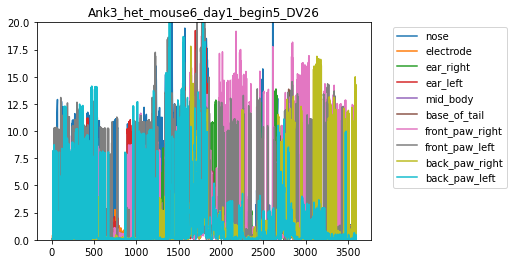

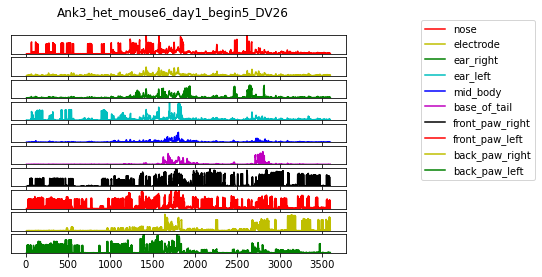

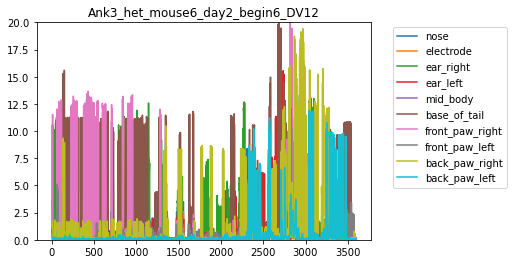

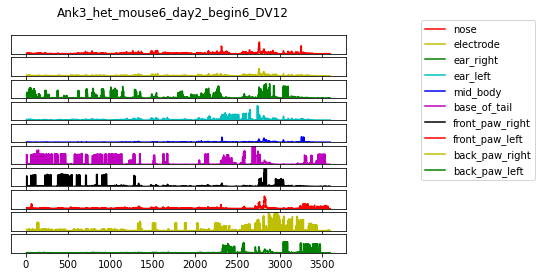

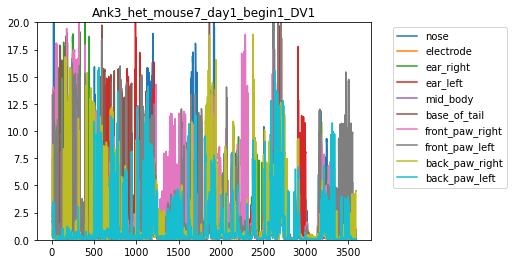

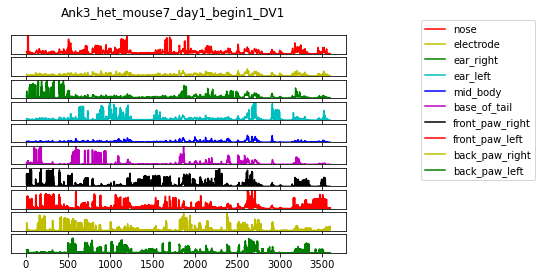

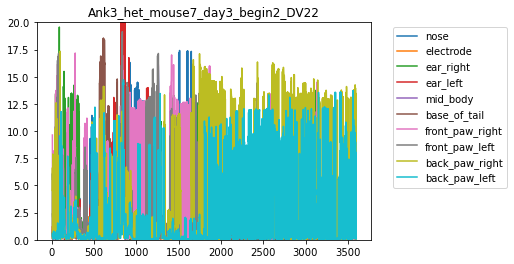

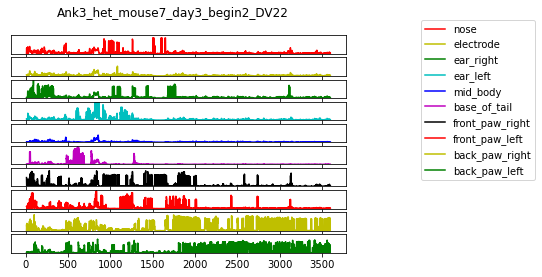

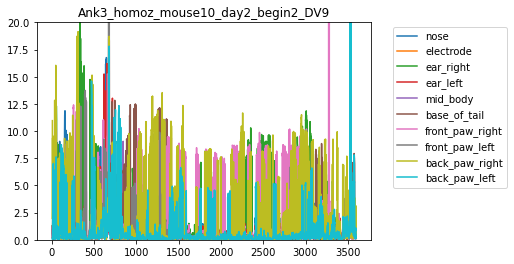

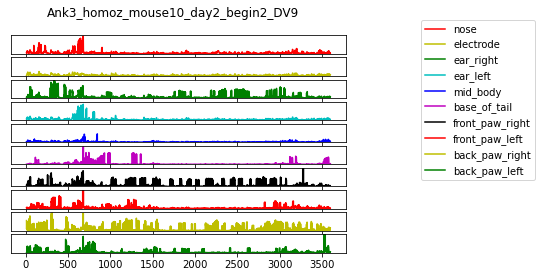

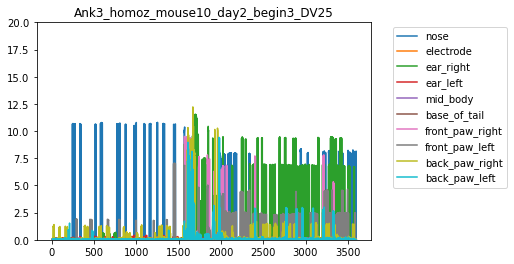

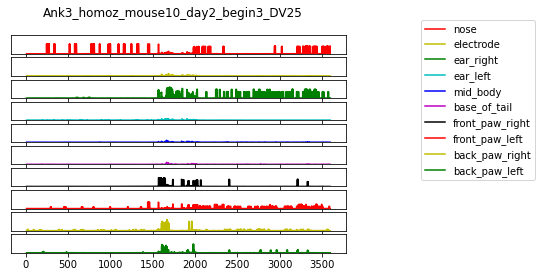

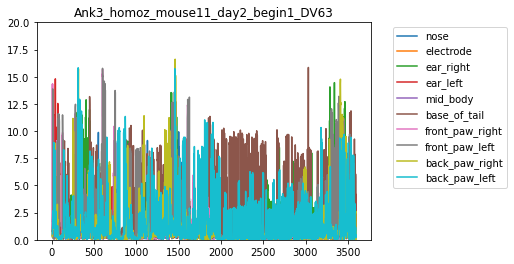

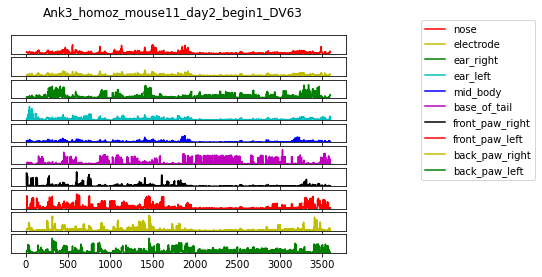

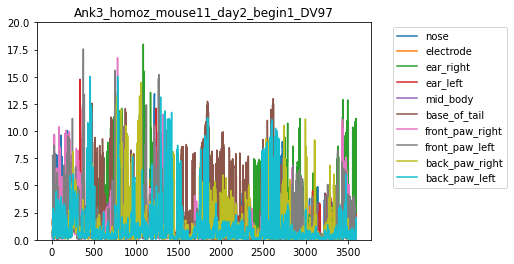

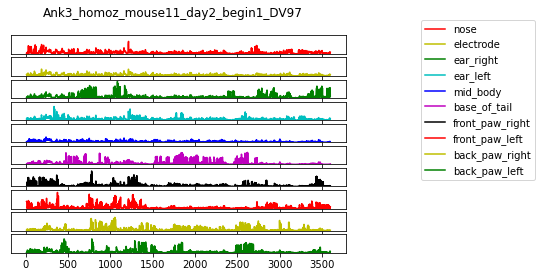

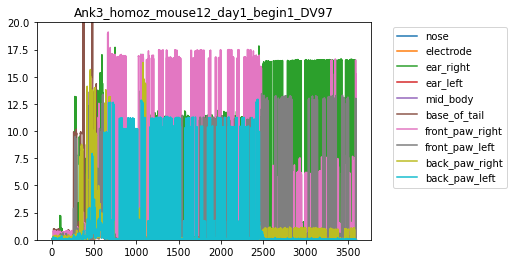

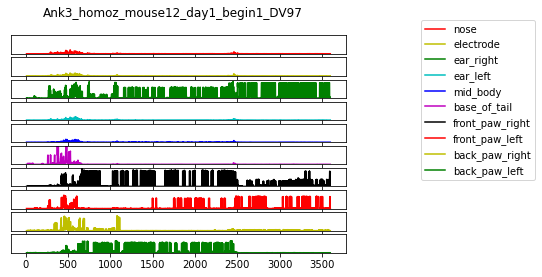

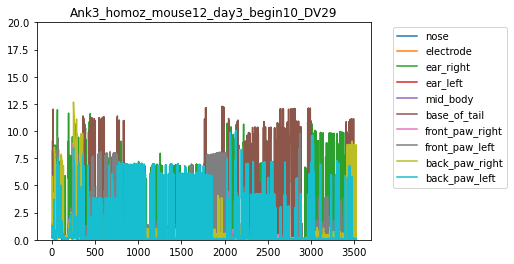

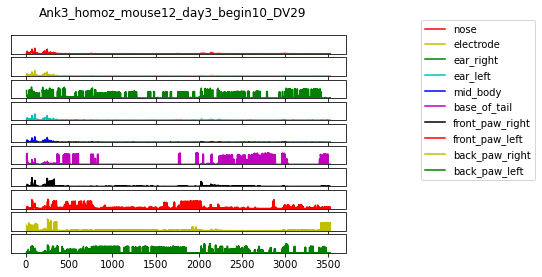

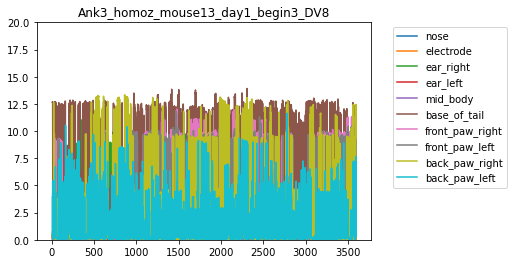

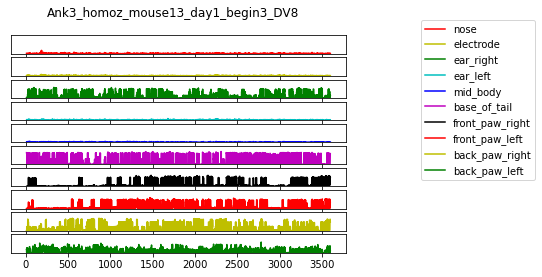

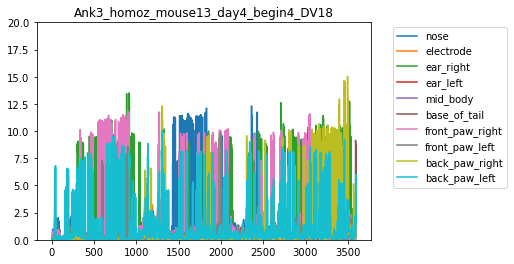

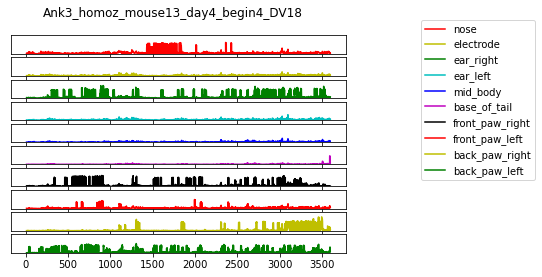

In [8]:
directory = csv_location

for file in os.listdir(directory):
    file_path = os.path.join(directory, file)
    df = readCSV(file_path)
    
    layerPlot(df, file[:-53])
    singlePlot(df, file[:-53])